# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откройте файл с данными и изучите общую информацию. 

### Загружаем данные из csv-файла в датафрейм c помощью библиотеки pandas.

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:

try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('/Users/maria_myachina/Downloads/Аналитик данных (Яндекс Практикум)/Проекты/03_Apartments/real_estate_data.csv', sep='\t')
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


### Изучаем общую информацию о полученном датафрейме.

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Строим гистограмму для всех числовых столбцов таблицы на одном графике.

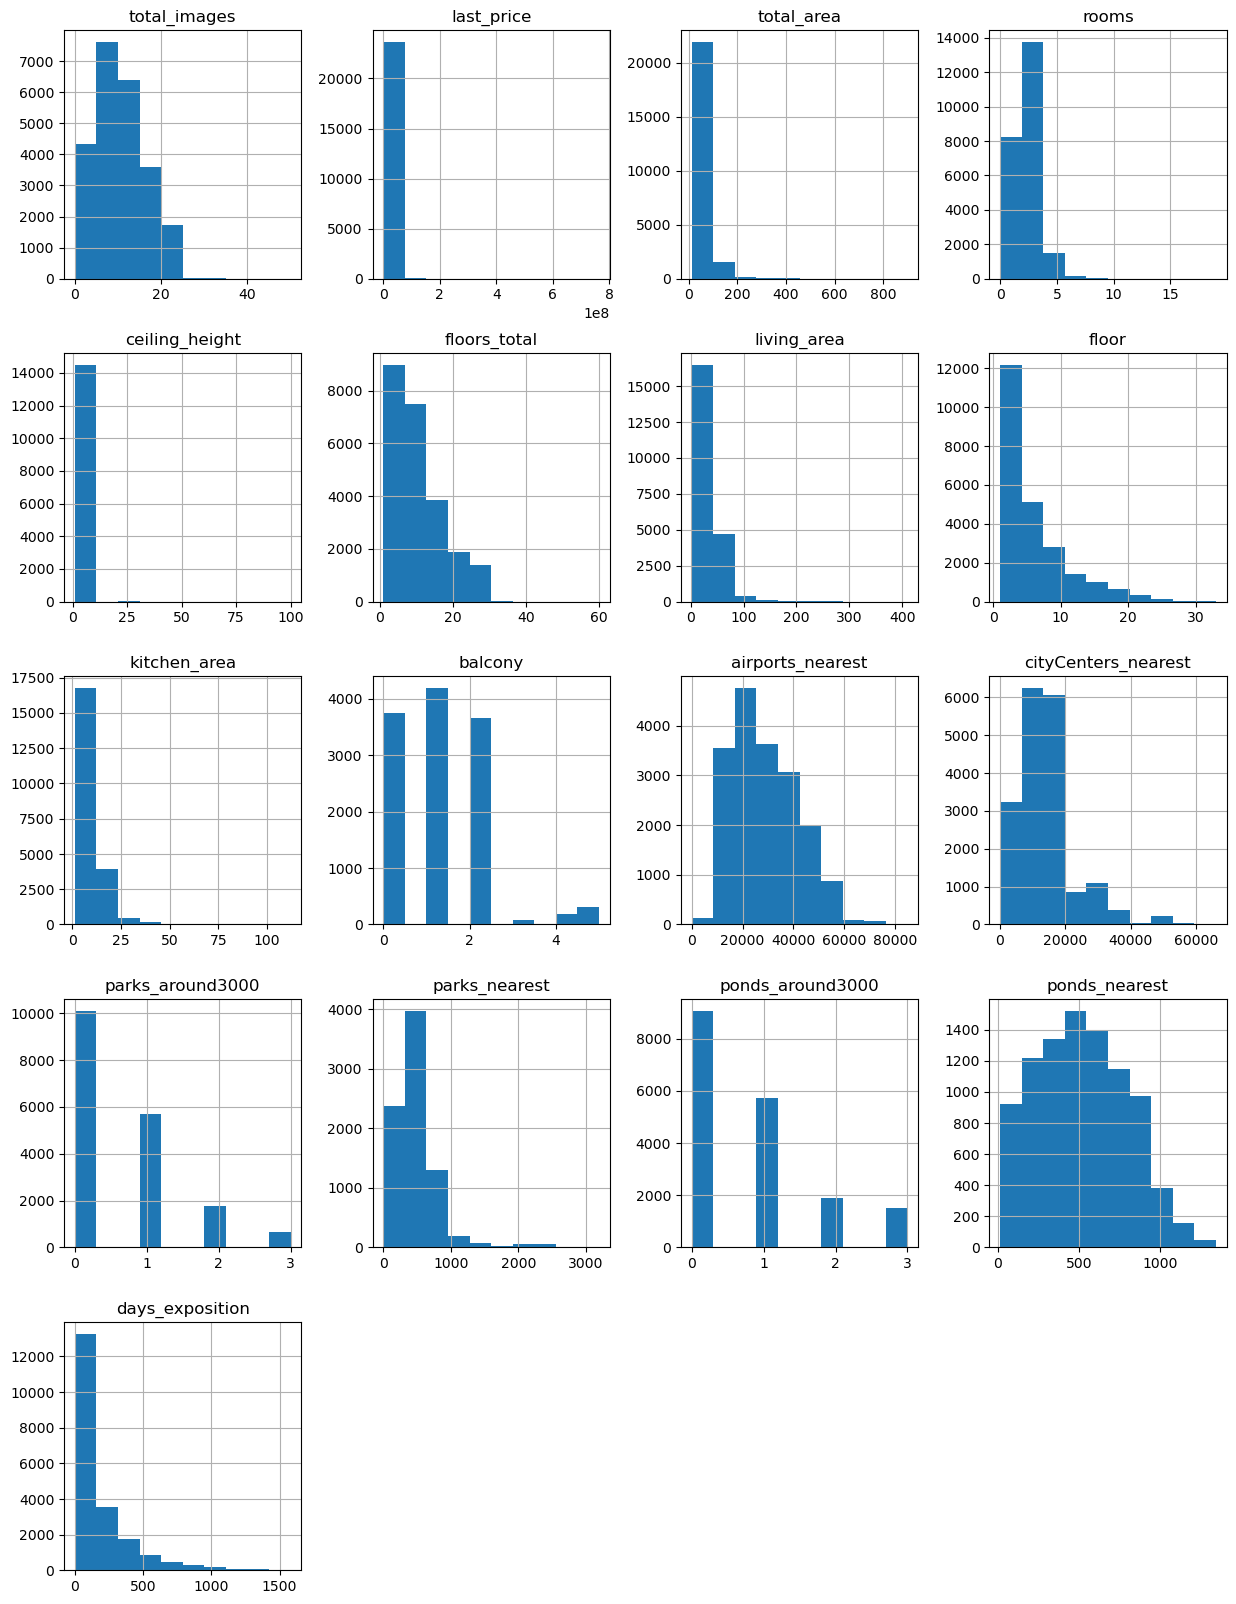

In [3]:
df.hist(figsize=(15, 20))
plt.show()

При первоначальном изучении данных видим, что есть много пропусков в значениях, типы данных и значения не везде удобны для проведения анализа. Поэтому до анализа данных проведем предобработку данных.

## Предобработка данных

### Работаем с пропусками в данных

#### Определяем в каких столбцах есть пропуски и их количество.

In [4]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Заполним пропущенные значения там, где это возможно

Удалим строки со значением NaN в столбце locality_name, так как данные этих строк без данных о местоположении объекта практически бесполезны и не имеют смысла для анализа.

In [5]:
df = df.dropna(axis=0, how='all', subset=['locality_name'])

Заменяем пропуски на значение 0 в столбцах 'balcony', 'is_apartment', 'parks_around3000', 'ponds_around3000', так как в этих столбцах пропущенное значение означает отсутствие. Например, если количество парков поблизости не указано, значит их нет, то есть количество равно 0. Кроме того, столбец 'is_apartment' должен иметь булев тип, изменим его позднее.

In [6]:
df[['balcony', 'is_apartment', 'parks_around3000', 'ponds_around3000']] = \
df[['balcony', 'is_apartment', 'parks_around3000', 'ponds_around3000']].fillna(0)

Проверим какая дата первой публикации у объявлений, у которых в столбце days_exposition значение NaN.

In [7]:
print(df.loc[df['days_exposition'].isnull(), 'first_day_exposition'])

0        2019-03-07T00:00:00
7        2019-04-18T00:00:00
44       2018-11-18T00:00:00
45       2018-12-02T00:00:00
46       2019-01-31T00:00:00
                ...         
23684    2018-11-02T00:00:00
23685    2019-01-24T00:00:00
23694    2017-03-21T00:00:00
23696    2018-02-11T00:00:00
23698    2017-07-21T00:00:00
Name: first_day_exposition, Length: 3180, dtype: object


Так как в строках со значением NaN в столбце days_exposition разные даты первой публикации, то можно сделать вывод, что эти объявления еще не сняты, поэтому рассчитать количество дней с даты публикации до даты снятия невозможно. Заменить эти значения на 0 также нельзя.

Заменим пропуски в столбце ceiling_height медианным значением, так как высота потолков - достаточно типовое значение при застройке.

In [8]:
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace=True)

Рассчитаем средние коэффициенты отношения жилой площади и площади кухни к общей площади и заменим пропуски в данных столбцах рассчитанными значениями с учетом полученных коэффициентов.

In [9]:
la_coef = df['living_area'].mean() / df['total_area'].mean()
df['living_area'].fillna(la_coef * df['total_area'], inplace=True)

ka_coef = df['kitchen_area'].mean() / df['total_area'].mean()
df['kitchen_area'].fillna(ka_coef * df['total_area'], inplace=True)

df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64

У наличия пропусков, на мой взгляд, есть несколько основных причин:
- данные не указаны пользователем(высота потолка, жилая площадь, площадь кухни, количество этажей, название населенного пункта);
- если поблизости нет парков/прудов, то расстояние до них программа не может рассчитать;
- объявление не снято с публикации, поэтому количество дней от публикации до снятия рассчитать невозможно;
- некорректно указан адрес/название населенного пункта, поэтому программа не может рассчитать расстояние до ближайшего аэропорта/центра города + если квартира находится в поселке или деревне, такой точки как центр города для них может не существовать.

### Работаем с типами данных

#### Изменим тип данных в тех столбцах, где это необходимо:
- 'is_apartment' меняем на булев тип;
- 'balcony', 'parks_around3000', 'ponds_around3000' меняем на тип целое число, так как число в данных столбцах не может быть дробным;
- 'first_day_exposition' меняем на тип даты и времени.

В столбцах 'floors_total', 'days_exposition' тип данных менять не будем, так как не можем заменить значения NaN на 0. В данных случаях значения NaN имеют смысл.

In [10]:
df['is_apartment'] = df['is_apartment'].astype(bool)

df[['balcony', 'parks_around3000', 'ponds_around3000']] = \
df[['balcony', 'parks_around3000', 'ponds_around3000']] \
.astype(int)

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

df['locality_name'] = df['locality_name'].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony              

### Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты.

#### Изучим уникальные значения в столбце с названиями.

In [11]:
print(df['locality_name'].sort_values().unique())
print('Общее количество наименований населенных пунктов:', df['locality_name'].nunique())

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'деревн

#### Устраняем неявные дубликаты:
- заменяем везде букву ё на е;
- заменяем все варианты написания населенного пункта поселкового типа на "поселок";
- заменяем "садоводческое некоммерческое товарищество" на "садовое товарищество".

In [12]:
df['locality_name'] = (
    df['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'городской поселок', 'коттеджный поселок', 'поселок станции', 'поселок имени', 'поселок при железнодорожной станции'], 'поселок', regex=True)
)

df['locality_name'] = (df['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'садовое товарищество', regex=True))

print(df['locality_name'].sort_values().unique())
print('Общее количество наименований населенных пунктов:', df['locality_name'].nunique())


['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалево' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'деревня Агалатово' 'деревня Аро' 'деревня Батово'
 'деревня Бегуницы' 'деревня Белогорка' 'деревня Большая Вруда'
 'деревня Большая Пустомержа' 'деревня Большие Колпаны'
 'деревня Большое Рейзино' 'деревня Большой Сабск' 'деревня Бор'
 'деревня Борисова Грива' 'деревня Ваганово' 'деревня Вартемяги'
 'деревня Вахнова Кара' 'деревня Выскатка' 'деревня Гарболово'
 'деревня Глинка' 'деревня Горбунки' 'деревня Гостилицы'
 'деревня Заклинье' 'деревня Заневка' 'деревня Зимитицы' 'деревня Извар

## Добавим в таблицу новые столбцы с расчетами

### Рассчитаем цену одного квадратного метра (округлить до двух знаков после запятой)

In [13]:
df['price_m2'] = round((df['last_price'] / df['total_area']), 2)

### Выделим день недели, месяц и год публикации объявления

In [14]:
df['day_of_week'] = df['first_day_exposition'].dt.weekday #0 — понедельник, 1 — вторник,и т.д.
df['month_of_publication'] = df['first_day_exposition'].dt.month
df['year_of_publication'] = df['first_day_exposition'].dt.year

### Классифицируем тип этажа квартиры (значения — «первый», «последний», «другой»).

In [15]:
def ftype(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

df['floor_type'] = df.apply(lambda row: ftype(row), axis=1)

### Рассчитаем расстояние до центра города в километрах (округлим до ближайших целых значений).

In [16]:
df['cityCenters_nearest_km'] = round(df['cityCenters_nearest'] / 1000)

### Выведем первые 5 строк таблицы с новыми столбцами.

In [17]:
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,day_of_week,month_of_publication,year_of_publication,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,90.790205,9,False,...,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.0


## Проведем исследовательский анализ данных

### Построим отдельные гистограммы для каждого из параметров ниже, проведем анализ и работу с полученными данными. 

Список параметров:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка

#### Общая площадь

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


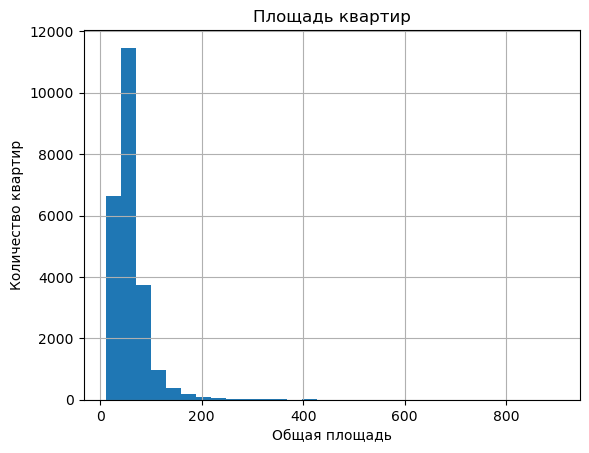

       total_area  rooms  one_room_area_avg
19540      900.00     12          75.000000
12859      631.20      7          90.171429
3117       631.00      7          90.142857
15651      618.00      7          88.285714
5358       590.00     15          39.333333
4237       517.00      7          73.857143
8018       507.00      5         101.400000
15016      500.00      4         125.000000
5893       500.00      6          83.333333
12401      495.00      7          70.714286
9826       494.10      1         494.100000
22494      491.00      5          98.200000
6621       488.00      5          97.600000
660        483.90      7          69.128571
6221       470.30      4         117.575000
20273      460.80      6          76.800000
3676       441.98      4         110.495000
21955      431.00      7          61.571429
22131      422.20      5          84.440000
14991      413.50      7          59.071429
13749      410.00      6          68.333333
14088      402.00      6        

In [18]:
print(df['total_area'].describe())
plt.hist(df['total_area'], bins=30)
plt.grid(True)
plt.title('Площадь квартир')
plt.xlabel('Общая площадь')
plt.ylabel('Количество квартир')
plt.show()

ta_rooms = pd.DataFrame()
ta_rooms['total_area'] = df['total_area']
ta_rooms['rooms'] = df['rooms']
ta_rooms['one_room_area_avg'] = df['total_area'] / df['rooms']
print(ta_rooms.sort_values(by='total_area',ascending=False).head(30))

На гистограмме по столбцу с общей площадью мы видим, что квартир с площадью больше 200 м2 очень мало. Для проверки аномальности этих данных дополнительно рассчитала среднюю площадь одной комнаты в зависимости от общей площади. Данные показывают, что в объявлениях с наибольшей площадью квартир указаны довольно редкие данные, которые помешают анализу. Уберем эти данные и построим новую гистограмму без учета квартир с площадью более 200 м2.

count    23423.000000
mean        58.155492
std         26.518218
min         12.000000
25%         40.000000
50%         51.800000
75%         68.800000
max        200.000000
Name: total_area, dtype: float64


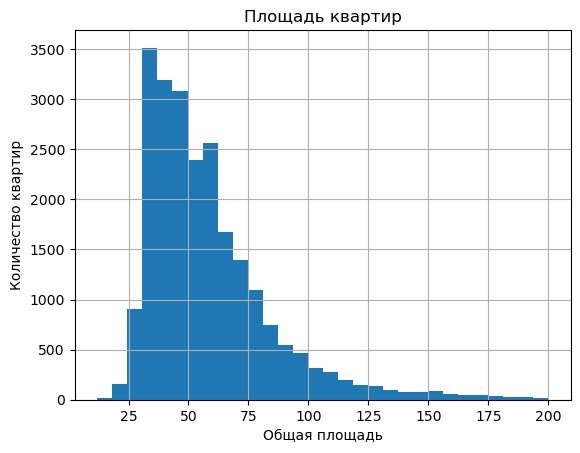

In [19]:
df.drop(df.loc[df['total_area'] > 200].index, inplace=True)

print(df['total_area'].describe())

plt.hist(df['total_area'], bins=30)
plt.grid(True)
plt.title('Площадь квартир')
plt.xlabel('Общая площадь')
plt.ylabel('Количество квартир')
plt.show()

В новой гистограмме распределение нормальное, более данные по данному столбцу корректировать не будем.

#### Жилая площадь и площадь кухни

count    23423.000000
mean        33.290629
std         17.283879
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64
Axes(0.125,0.11;0.775x0.77)


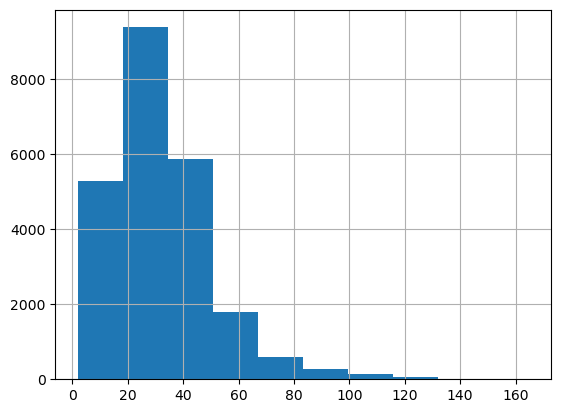

count    23423.000000
mean        10.283091
std          5.333307
min          1.300000
25%          7.000000
50%          9.000000
75%         11.800000
max         93.200000
Name: kitchen_area, dtype: float64
Axes(0.125,0.11;0.775x0.77)


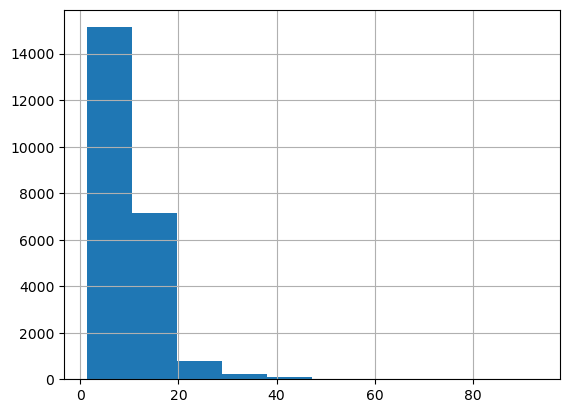

Корреляция между общей и жилой площадью: 0.93
Корреляция между общей площадью и площадью кухни: 0.61


In [20]:
print(df['living_area'].describe())
print(df['living_area'].hist())
plt.show()

print(df['kitchen_area'].describe())
print(df['kitchen_area'].hist())
plt.show()

print('Корреляция между общей и жилой площадью:', df['total_area'].corr(df['living_area']).round(2))
print('Корреляция между общей площадью и площадью кухни:',df['total_area'].corr(df['kitchen_area']).round(2))

Мы видим, что жилая площадь и площадь кухни зависят от общей площади квартиры. При этом если жилая площадь практически напрямую зависит от общей площади, то площадь кухни имеет корреляцию с общей площадью 0.56. С учетом данных о средней общей площади и средней площади кухни и медианных значениях можно сказать, что в большей части квартир площадь кухни примерно одинаковая, и только в больших квартирах больше среднего площадь кухни начинает расти. 

#### Цена объекта

count    23423.000000
mean         6.024801
std          6.240963
min          0.012190
25%          3.400000
50%          4.600000
75%          6.700000
max        330.000000
Name: last_price_mln, dtype: float64


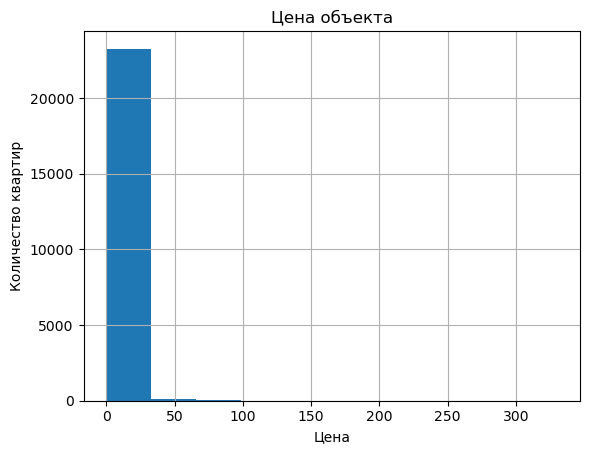

In [21]:
df['last_price_mln'] = df['last_price'] / 1000000
#переведем данные в млн для удобства и наглядности

print(df['last_price_mln'].describe())

plt.hist(df['last_price_mln'])
plt.grid(True)
plt.title('Цена объекта')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.show()

Видим, что объекты стоимостью более 50 млн практически не встречаются. Исключим их из данных.

In [22]:
df.drop(df.loc[df['last_price_mln'] > 50].index, inplace=True)

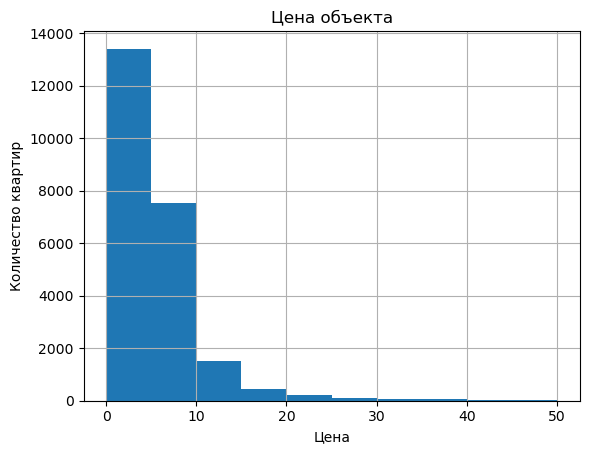

In [23]:
plt.hist(df['last_price_mln'])
plt.grid(True)
plt.title('Цена объекта')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.show()

Распределение нормальное, большая часть объектов стоит до 10 млн. Объекты с более высокой стоимостью встречаются редко.

#### Количество комнат

count    23373.00000
mean         2.03119
std          0.99417
min          0.00000
25%          1.00000
50%          2.00000
75%          3.00000
max         11.00000
Name: rooms, dtype: float64


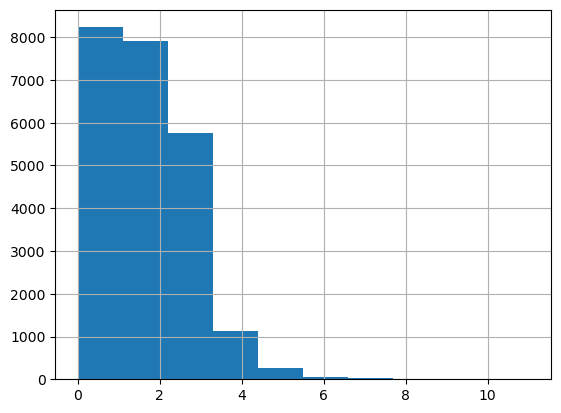

In [24]:
print(df['rooms'].describe())
df['rooms'].hist()
plt.show()

In [25]:
print(df[['rooms','studio']].query('rooms == 0'))
#проверим все ли квартиры с 0 комнат студии

       rooms  studio
144        0    True
349        0   False
440        0    True
508        0   False
608        0    True
...      ...     ...
23210      0    True
23442      0   False
23554      0    True
23592      0   False
23637      0    True

[196 rows x 2 columns]


Как видим, не все квартиры с 0 комнат являются студиями. Заменим данные там, где квартира не является студией на 1.

count    23373.000000
mean         2.033671
std          0.990337
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64


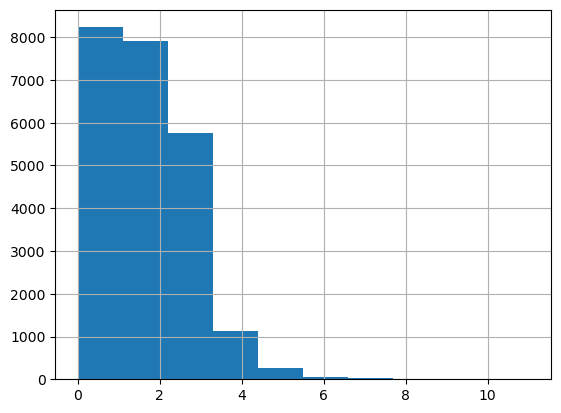

In [26]:
df.loc[(df['rooms'] == 0) & (df['studio'] == False), 'rooms'] = 1

print(df['rooms'].describe())
df['rooms'].hist()
plt.show()

Более данные корректировать не будем. В основном в квартирах от 0 до 4 комнат. Большее количество комнат встречается редко, хотя в целом такие квартиры могут быть.

#### Высота потолков

count    23373.000000
mean         2.719408
std          0.992164
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


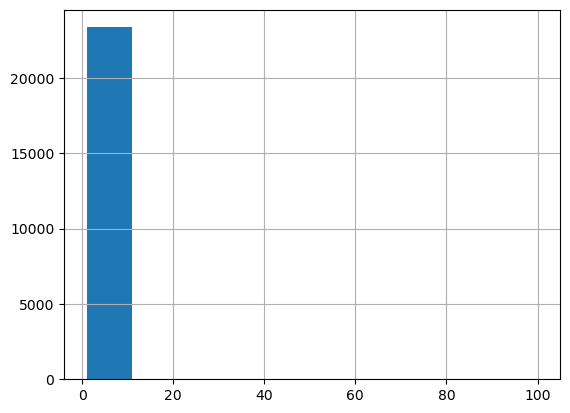

In [27]:
print(df['ceiling_height'].describe())
(df['ceiling_height']).hist()
plt.show()

Видим, что распределение странное, встречаются выбивающиеся значения. Посмотрим самые большие значения столбца ceiling_height.

In [28]:
print(df['ceiling_height'].sort_values(ascending=False).head(30))

22869    100.0
22336     32.0
3148      32.0
21377     27.5
5807      27.0
5246      27.0
21824     27.0
10773     27.0
4876      27.0
17857     27.0
20478     27.0
22938     27.0
5669      26.0
11285     25.0
4643      25.0
6246      25.0
14382     25.0
9379      25.0
18545     25.0
355       25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
5863       8.3
3474       8.0
17442      8.0
15743      8.0
21227      5.8
Name: ceiling_height, dtype: float64


Значения от 10 очевидно указаны некорректно. Логично предположить, что на самом деле должны быть указаны значения в 10 раз меньше (например, не 20.0, а 2.0). Произведем замену, а затем посмотрим минимальные значения столбца ceiling_height.

In [29]:
df.loc[df['ceiling_height'] > 10, 'ceiling_height'] = df['ceiling_height'] / 10

print(df['ceiling_height'].sort_values(ascending=True).head(40))

22590    1.00
22309    1.03
5712     1.20
15061    1.40
16934    1.75
22960    2.00
17496    2.00
552      2.00
16884    2.00
4212     2.00
19098    2.00
20520    2.00
5850     2.00
19329    2.00
2572     2.00
16446    2.00
11352    2.00
12755    2.20
17794    2.25
20507    2.26
5498     2.30
1582     2.30
17762    2.30
23498    2.30
227      2.34
5076     2.40
20085    2.40
5542     2.40
15444    2.40
20564    2.40
15453    2.40
1322     2.40
12069    2.40
15939    2.40
2236     2.40
14345    2.40
10160    2.40
14463    2.40
13462    2.40
11868    2.40
Name: ceiling_height, dtype: float64


Видим, что есть нереалистично маленькие значения. Минимальной нормой в России считается высота потолка 2.50, но с учетом ремонтных работ высота потолка могла быть сокращена. Кроме того, значение 2.40 указано довольно часто. Поэтому удалим строки с высотой потолка меньше 2.40.

count    23348.000000
mean         2.693277
std          0.224322
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64


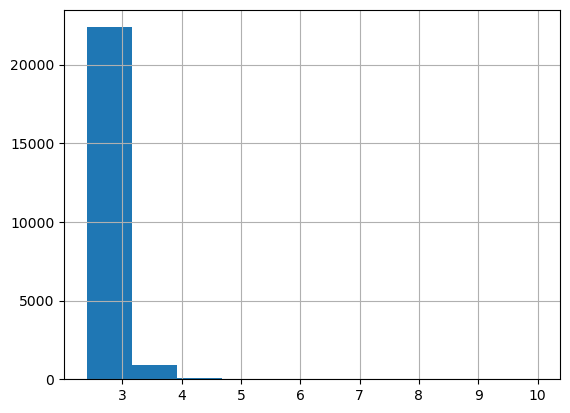

In [30]:
df.drop(df.loc[df['ceiling_height'] < 2.40].index, inplace=True)

print(df['ceiling_height'].describe())
(df['ceiling_height']).hist()
plt.show()

Видим, что высота потолка выше 4 м встречается крайне редко, исключим эти данные.

count    23310.000000
mean         2.689579
std          0.196482
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64


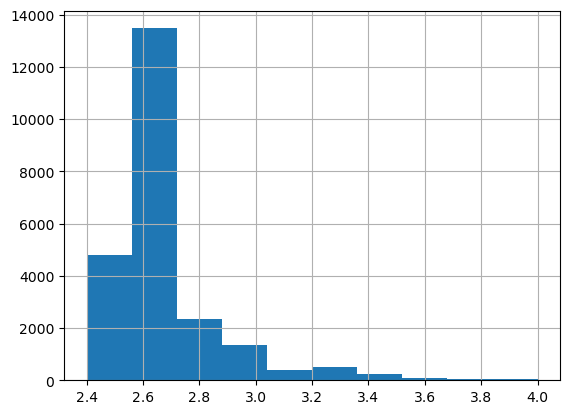

In [31]:
df.drop(df.loc[df['ceiling_height'] > 4.0].index, inplace=True)

print(df['ceiling_height'].describe())
(df['ceiling_height']).hist()
plt.show()

Таким образом, чаще всего высота потолка составляет 2.4-3.0 метров, более высокие потолки встречаются значительно реже.

#### Тип этажа квартиры 

count      23310
unique         3
top       другой
freq       17192
Name: floor_type, dtype: object


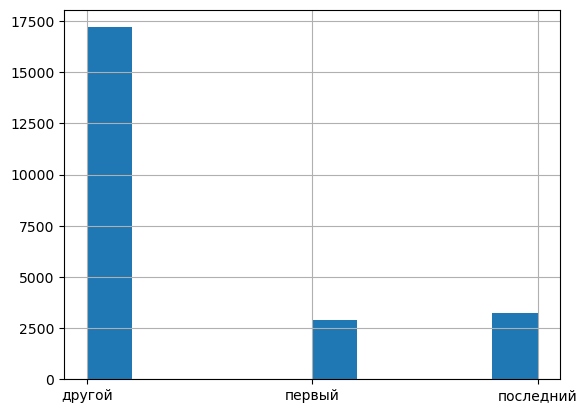

In [32]:
print(df['floor_type'].describe())
df['floor_type'].hist()
plt.show()

Здесь с данными все в порядке. Больше всего квартир не на первом и не на последнем этаже, что вполне логично.

#### Общее количество этажей в доме

count    23226.000000
mean        10.731594
std          6.606448
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64
Axes(0.125,0.11;0.775x0.77)


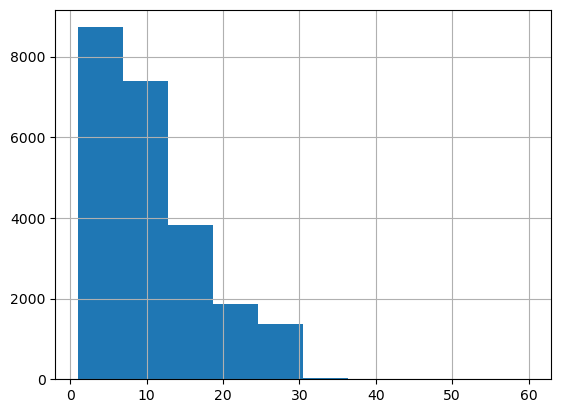

In [33]:
print(df['floors_total'].describe())
print(df['floors_total'].hist())

С данными все в порядке. Видим, что дома высотой больше 30 этажей встречаются редко, но на анализ эти цифры не повлияют.

#### Расстояние до центра города

count    17824.000000
mean     14325.679814
std       8587.723800
min        181.000000
25%       9496.000000
50%      13184.500000
75%      16360.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


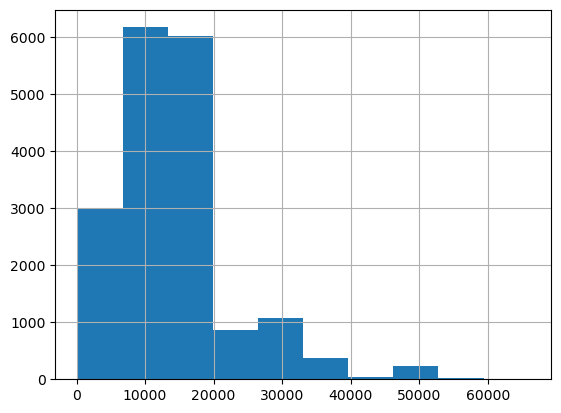

In [34]:
print(df['cityCenters_nearest'].describe())
df['cityCenters_nearest'].hist()
plt.show()

В целом данные выглядят нормально. Есть выделяющееся значение количества квартир на расстоянии 50 000 м от центра города. Вероятно, на этом расстоянии находятся густозаселенные районы города.

#### Расстояние до ближайшего парка

count    7845.000000
mean      492.732059
std       343.484570
min         1.000000
25%       288.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64


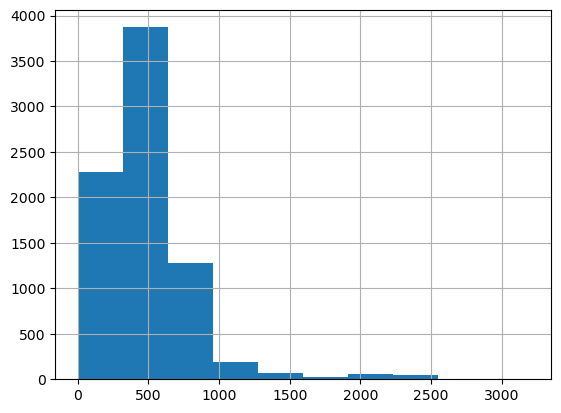

In [35]:
print(df['parks_nearest'].describe())
df['parks_nearest'].hist()
plt.show()

В основном парки расположены на расстоянии не более 1000 м, но есть и гораздо более удаленные от парков объекты, до 3190 м. Данные выглядят нормально, и корректировать их не будем.

### Изучим, как быстро продавались квартиры

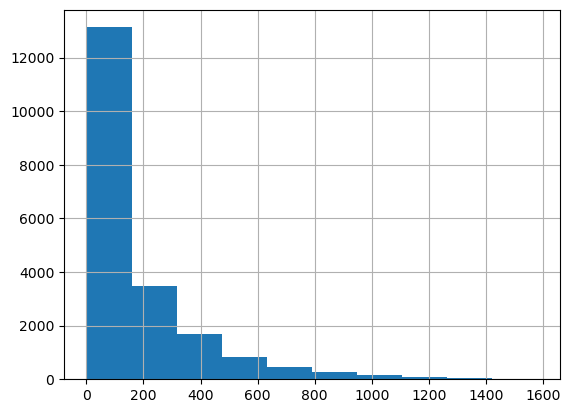

count    20204.000000
mean       179.295783
std        218.226409
min          1.000000
25%         45.000000
50%         95.000000
75%        228.250000
max       1580.000000
Name: days_exposition, dtype: float64

В среднем продажа объекта занимает: 179.0 дней.
Медианное значение дней для продажи объекта составляет: 95.0 дней.


In [36]:
df['days_exposition'].hist()
plt.show()

print(df['days_exposition'].describe())
print()
print('В среднем продажа объекта занимает:', round(df['days_exposition'].mean(),0), 'дней.')
print('Медианное значение дней для продажи объекта составляет:', round(df['days_exposition'].median(),0),'дней.')

В среднем продажа квартиры занимает полгода, но для большинства объектов более характерен срок продажи 3 месяца. На среднее значение сильно влияют объекты с длительным сроком продажи более 1,5 лет. 

Сроки продажи 1-2 дня можно считать очень быстрыми. А вот сроки более 2-3 лет можно считать необычно долгими. Такие длительные сроки продажи могут быть характерны для нестандартных и дорогих объектов.

### Изучим факторы, которые больше всего влияют на общую (полную) стоимость объекта

#### Общая площадь

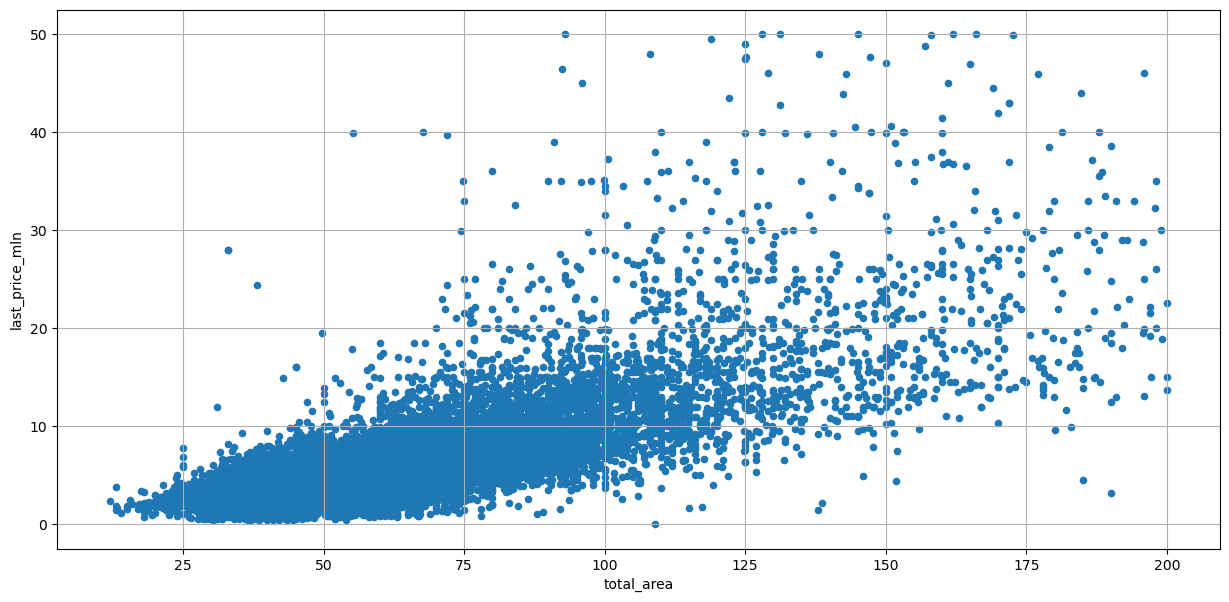

0.7655912550004328


In [37]:
df.plot(x='total_area', y='last_price_mln', kind='scatter', grid=True, figsize=(15,7))
plt.show()

print(df['last_price_mln'].corr(df['total_area']))

Зависимость стоимости квартиры от **общей площади** есть, и она довольно высокая. Но определенно на стоимость влияют и другие факторы, так как у квартир одной и той же площади может быть большой разброс в цене. И чем больше площадь квартиры, тем больше возможный разброс в цене. 

#### Жилая площадь и площадь кухни

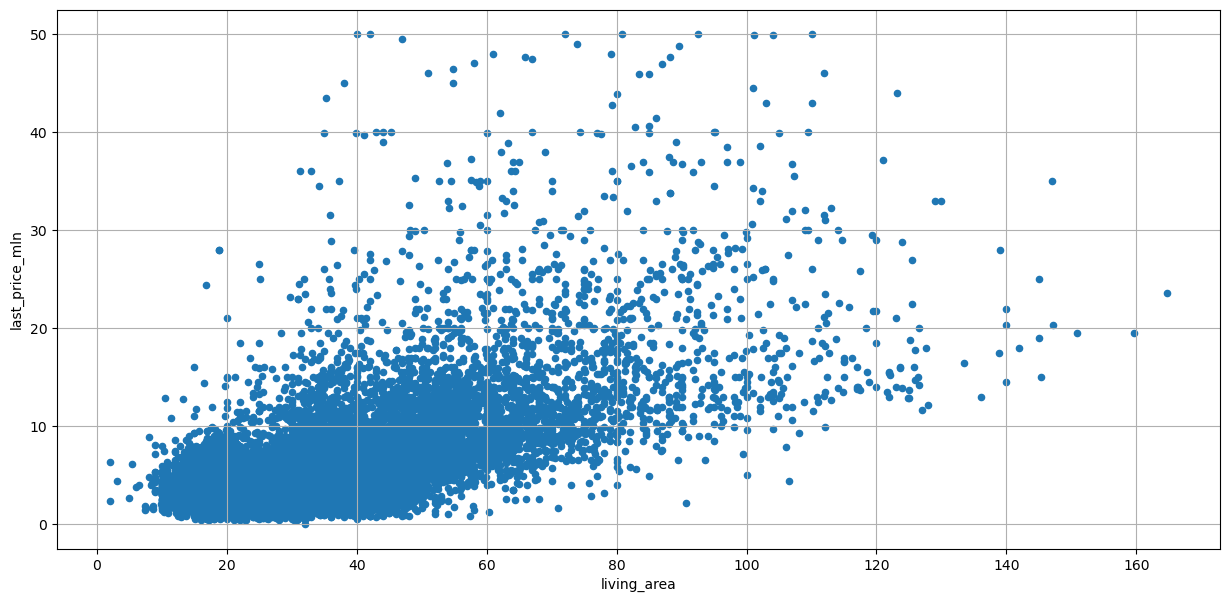

0.6591984398512023


In [38]:
df.plot(x='living_area', y='last_price_mln', kind='scatter', grid=True, figsize=(15,7))
plt.show()

print(df['last_price_mln'].corr(df['living_area']))

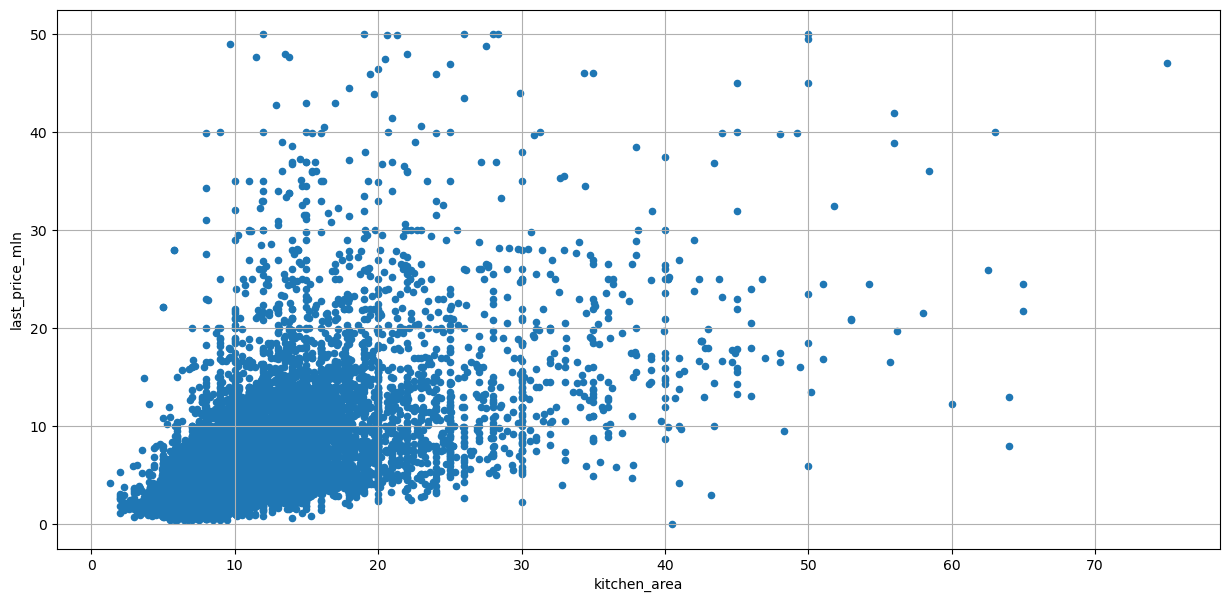

0.6058158341374251


In [39]:
df.plot(x='kitchen_area', y='last_price_mln', kind='scatter', grid=True, figsize=(15,7))
plt.show()

print(df['last_price_mln'].corr(df['kitchen_area']))

Зависимость стоимости квартиры от **жилой площади и площади кухни** также есть, и она довольно высокая, так как эти показатели практически напрямую зависят от общей площади. Но все-таки больше всего на стоимость влияет именно общая площадь объекта.  

#### Количество комнат

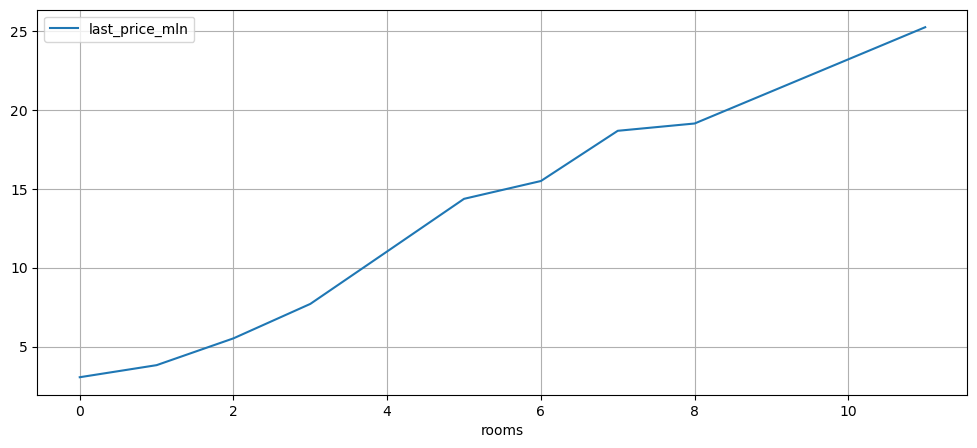

0.4705033954572227


In [40]:
(
df.pivot_table(index='rooms', values='last_price_mln')
.plot(grid=True, figsize=(12,5))
)
plt.show()

print(df['last_price_mln'].corr(df['rooms']))

Стоимость объекта не так сильно зависит от **количества комнат**. Хотя в целом подтверждаются предыдущие выводы: стоимость выше, чем больше общая площадь, а чем больше общая площадь, то тем больше комнат (в большинстве случаев).

#### Этаж

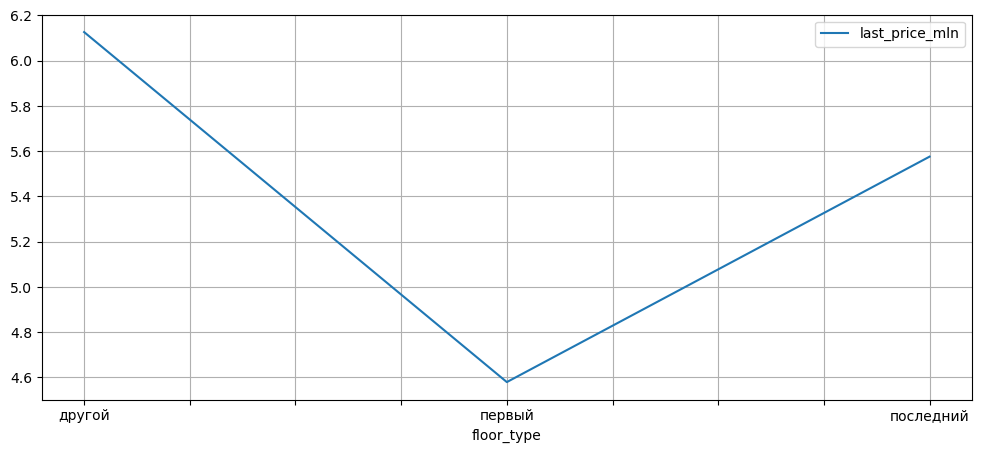

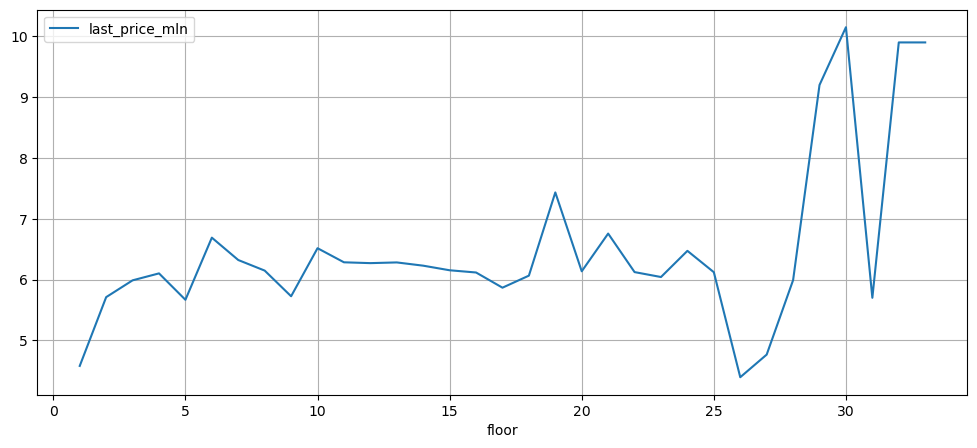

0.0642612320915734


In [41]:
(
df.pivot_table(index='floor_type', values='last_price_mln')
.plot(grid=True, figsize=(12,5))
)
plt.show()

(
df.pivot_table(index='floor', values='last_price_mln')
.plot(grid=True, figsize=(12,5))
)
plt.show()

print(df['last_price_mln'].corr(df['floor']))

Стоимость объекта довольно сильно зависит от **этажа**. Квартиры на первом этаже стоят заметно меньше, чем на последнем или других этажах. А вот от конкретного номера этажа зависимости практически нет.

#### День, месяц и год публикации объявления

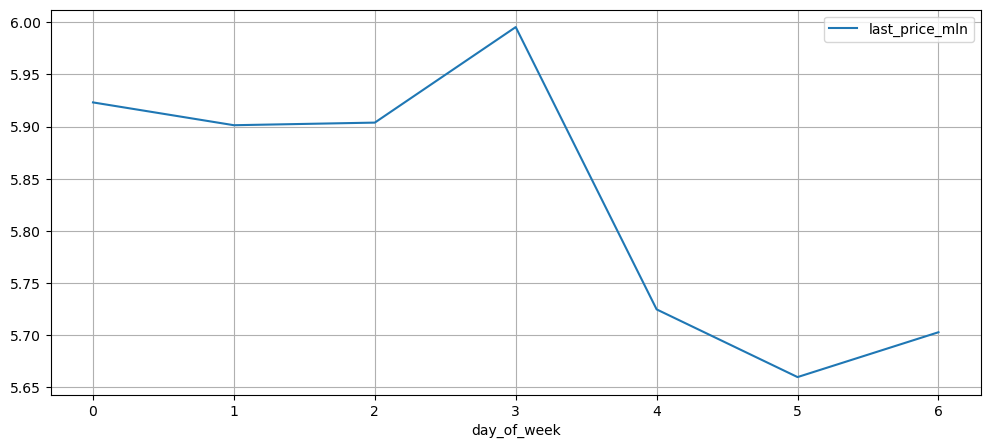

-0.01706871185276106


In [42]:
(
df.pivot_table(index='day_of_week', values='last_price_mln')
.plot(grid=True, figsize=(12,5))
)
plt.show()

print(df['last_price_mln'].corr(df['day_of_week']))

Также наблюдается зависимость стоимости от **дня публикации объявления**. В объявлениях, опубликованных в будние дни, особенно в четверг, стоимость значительно выше, чем в объявлениях, опубликованных в конце недели, начиная с пятницы.

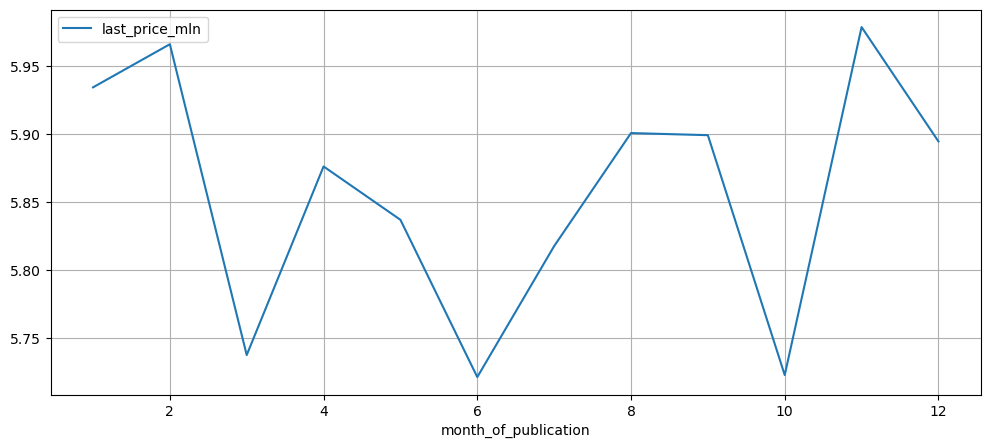

0.00030749602991947584


In [43]:
(
df.pivot_table(index='month_of_publication', values='last_price_mln')
.plot(grid=True, figsize=(12,5))
)
plt.show()

print(df['last_price_mln'].corr(df['month_of_publication']))

Зависимость стоимости от **месяца публикации объявления** практически отсутствует.

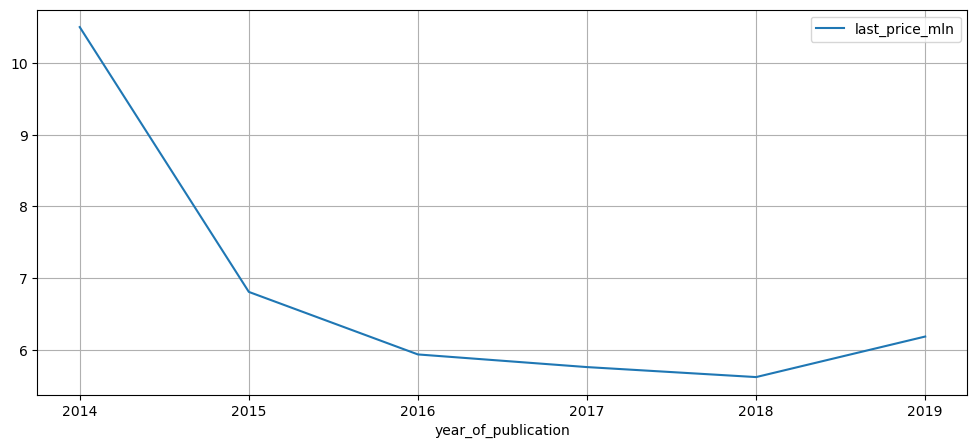

-0.039036452158275434


In [44]:
(
df.pivot_table(index='year_of_publication', values='last_price_mln')
.plot(grid=True, figsize=(12,5))
)
plt.show()

print(df['last_price_mln'].corr(df['year_of_publication']))

Зависимость стоимости от **года публикации объявления** довольно высокая. В 2014 году цены были на своем максимуме (за исследуемый период). В последующие годы стоимость объектов сильно упала. Небольшой рост начался только в 2019 году.

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений 

In [45]:
df2 = df.pivot_table(index='locality_name', values='price_m2', aggfunc=['count','mean'])
df2.columns = ['count', 'mean']
df2['mean'] = round(df2['mean'], 2)
print(df2.sort_values(['count', 'mean'], ascending=False).head(10))

                   count       mean
locality_name                      
Санкт-Петербург    15418  112165.17
поселок Мурино       556   85681.76
поселок Шушары       440   78677.36
Всеволожск           396   68670.46
Пушкин               363  103054.14
Колпино              337   75333.30
поселок Парголово    326   90332.26
Гатчина              307   68746.15
деревня Кудрово      299   92473.55
Выборг               234   58190.13


Видим, что самая высокая стоимость за м2 и наибольшее количество объявлений в Санкт-Петербурге: средняя цена м2 составляет 112 т.р., а объявлений более 15 тысяч. Во всех остальных населенных пунктах продается гораздо меньше объектов: от 237 до 554. Помимо Санкт-Петербурга 3 самых "дорогих" населенных пункта: Пушкин, деревня Кудрово и поселок Парголово. 3 самых "дешевых" населенных пункта: Выборг, Всеволжск и Гатчина. Прямой зависимости между количеством продаваемых объектов в населенном пункте и стоимостью м2 нет.

### Вычислим среднюю стоимость квартир в Санкт-Петербурге на разном удалении от центра

In [46]:
df_spb = df.query('locality_name == "Санкт-Петербург"')
print('Минимальное расстояние до центра:', df_spb['cityCenters_nearest_km'].min())
print('Максимальное расстояние до центра:', df_spb['cityCenters_nearest_km'].max())

Минимальное расстояние до центра: 0.0
Максимальное расстояние до центра: 29.0


cityCenters_nearest_km
0.0     21.44
1.0     12.48
2.0     11.65
3.0     10.11
4.0     10.72
5.0     11.28
6.0     11.12
7.0     11.27
8.0      8.93
9.0      6.90
10.0     6.37
11.0     6.12
12.0     5.78
13.0     6.06
14.0     5.59
15.0     5.81
16.0     5.36
17.0     5.20
18.0     4.87
19.0     5.04
20.0     5.99
21.0     5.49
22.0     5.42
23.0     4.69
24.0     3.85
25.0     4.05
26.0     3.97
27.0     8.30
28.0     5.03
29.0     4.24
Name: last_price_mln, dtype: float64


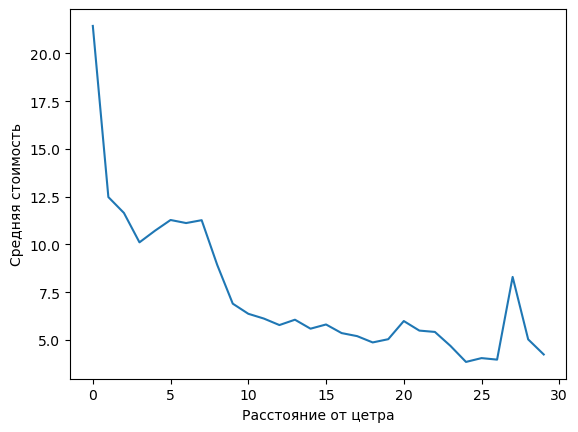

In [47]:
df3 = pd.DataFrame()
df3['cityCenters_nearest_km'] = df_spb['cityCenters_nearest_km']
df3['last_price_mln'] = df_spb['last_price_mln']
df3_grouped = df3.groupby('cityCenters_nearest_km')['last_price_mln'].aggregate('mean').round(2)
print(df3_grouped)

df3_grouped.plot(x='cityCenters_nearest_km', y='last_price_mln', kind='line') 
plt.xlabel('Расстояние от цетра')
plt.ylabel('Средняя стоимость')
plt.show()

В целом наблюдаем, что средняя стоимость объекта зависит от близости к центру города. При этом эта корреляция не стабильная, так как стоимость объекта зависит от нескольких факторов сразу. В частности наблюдаются несколько пиковых и провальных значений, которые могут указывать на более хорошие и плохие районы для проживания по комплексу факторов. 

## Общий вывод

Исходя из проведенного анализа, можем сделать вывод, что больше всего на стоимость квартиры влияет общая площадь и расположение. Чем больше квартира и ближе к центру (в том числе к центру региона) расположена, тем она дороже. Хотя есть исключения, связанные, вероятно, с благополучностью отдельных районов/населенных пунктов. Поэтому для более точного анализа следует изучить влияние на стоимость не только удаленности от центра, но и конкретного местоположения объекта, наличия рядом парков и прудов.

Жилая площадь, площадь кухни и количество комнат также влияют на цену объекта, что логично, так как данные параметры практически напрямую связаны с общей площадью квартиры.

Также значительное влияние на цену объектов оказывает общая экономическая ситуация, в зависимости от года продажи стоимость объектов сильно отличается. В 2014 году цены были на своем максимуме (за исследуемый период). В последующие годы стоимость объектов сильно упала. Небольшой рост начался только в 2019 году. Для более детального анализа можно рассмотреть данные за каждый год отдельно, так как в разных экономических условиях уровень влияния отдельных факторов может меняться. 

Кроме того, большое значение на финальную стоимость оказывает этаж квартиры. Квартиры на первых этажах стоят значительно дешевле. Наиболее высокая цена у квартир не на первом и не на последнем этажах. А вот зависимости от номера этажа, помимо первого и последнего, практически нет.

Также сильно на стоимость влияет день публикации объявления. В объявлениях, опубликованных в будние дни, особенно в четверг, стоимость значительно выше, чем в объявлениях, опубликованных в конце недели, начиная с пятницы.